In [4]:
# Importing needed libraries

# data manipulation
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import NearestNeighbors

#Evaluating model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


# 1 - Introduction and Problem Definition for Customer Segmentation

In the context of a marketing company, the primary objective is to optimize advertising campaigns to reach the most receptive audience and maximize the efficiency of marketing expenditures. To achieve this, we propose a customer segmentation strategy based on potential customers' income levels, as income can correlate significantly with purchasing power. By utilizing additional demographic and socio-economic features such as age, occupation, and education, we aim to enrich our audience profiles. This enriched profiling will allow us to tailor marketing campaigns more precisely, targeting specific segments with tailored messages and products that resonate with their unique preferences and financial capabilities. This approach not only enhances customer engagement but also improves the return on investment for marketing initiatives.

# 2 - Data Preparation

## 2.1 Loading the Dataset

To load the "Adult" dataset into a DataFrame named df. Typically, Python’s Pandas library is used for such tasks because it provides robust tools for data manipulation.

As in the dataset information explain, the missing values are the ones with the symbol '?', for this reason we have included the parameter na_values in the load command.

In [5]:
# Data Load from the repository Dane
df = pd.read_csv('Dane/adult.csv')

In [7]:
# Data Load from the repository Dane
df = pd.read_csv('Dane/adult.csv',na_values='?')


In [8]:
# observation of dataset head
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [9]:
df.shape

(48842, 15)

## 2.2 Cleaning the Data

After loading the data, the next step is to clean it. Generally, this involves handling missing values, removing duplicates, and correcting any inconsistencies in the data.

### a. Handling Missing Values:
Missing data is a common issue. For categorical data, we might choose to replace missing values with the mode (the most frequently occurring value) or simply remove rows with missing values depending on the amount of missing data.

In [10]:
# Check for missing values
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Given that workclass, occupation, and native-country contain missing values, it is neccesary to analyze the distribution of them, we are going to follow the next approach:
- Step 1: Analyze the Distribution of Missing Values
- Step 2: Examine Rows with Missing Values
- Step 3: Explore Relationships Between Missing Values and Other Variables
- Step 4: Compare the distribution of the target variable (income) in the rows with missing values with the overall distribution of income.
- Step 5: Decision Making

Based on this analysis:

- If missing data is randomly distributed and not significant in volume, removing these rows could be justified.
- If there are patterns or significant impacts on key variables like income, more nuanced approaches like imputation or even segment-specific strategies might be necessary.

In [11]:
# Step 1 Calculate the percentage of missing values in each column
missing_percentages = df.isnull().sum() / len(df) * 100
print(missing_percentages)

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64


Step 1: Proportion of Missing Values

The results show:

- workclass: Approximately 5.73% missing
- occupation: Approximately 5.75% missing
- native-country: Approximately 1.75% missing

In [12]:
# Step 2 Display rows with missing 'workclass'
print(df[df['workclass'].isnull()].head())

# Display rows with missing 'occupation'
print(df[df['occupation'].isnull()].head())

# Display rows with missing 'native-country'
print(df[df['native-country'].isnull()].head())


    age workclass  fnlwgt     education  educational-num      marital-status  \
4    18       NaN  103497  Some-college               10       Never-married   
6    29       NaN  227026       HS-grad                9       Never-married   
13   58       NaN  299831       HS-grad                9  Married-civ-spouse   
22   72       NaN  132015       7th-8th                4            Divorced   
35   65       NaN  191846       HS-grad                9  Married-civ-spouse   

   occupation   relationship   race  gender  capital-gain  capital-loss  \
4         NaN      Own-child  White  Female             0             0   
6         NaN      Unmarried  Black    Male             0             0   
13        NaN        Husband  White    Male             0             0   
22        NaN  Not-in-family  White  Female             0             0   
35        NaN        Husband  White    Male             0             0   

    hours-per-week native-country income  
4               30  Unite

Step 2: Characteristics of Rows with Missing Values

Missing workclass and occupation are interesting:

- Most rows with missing workclass and occupation have an income of <=50K.
- The missing values occur across different age groups and education levels.
- The native-country for the rows with missing workclass and occupation appears consistently as "United States", which might not impact the diversity of this subset significantly.

In [13]:
# Step 3 Check the unique values in 'income' for rows with missing 'workclass' or 'occupation'
if 'workclass' in df.columns and 'occupation' in df.columns and 'income' in df.columns:
    workclass_missing_income = df[df['workclass'].isnull()]['income'].value_counts()
    occupation_missing_income = df[df['occupation'].isnull()]['income'].value_counts()

    print("Income distribution for rows with missing 'workclass':")
    print(workclass_missing_income)
    print("\nIncome distribution for rows with missing 'occupation':")
    print(occupation_missing_income)
else:
    print("Please check column names and missing values filtering.")


Income distribution for rows with missing 'workclass':
<=50K    2534
>50K      265
Name: income, dtype: int64

Income distribution for rows with missing 'occupation':
<=50K    2544
>50K      265
Name: income, dtype: int64


Step 3: Income Distribution for Rows with Missing Values

The distribution for rows with missing workclass and occupation is heavily skewed towards <=50K:

- <=50K: 2534 entries
- \>50K: 265 entries

This skewness indicates that individuals missing this data are predominantly lower income, which could suggest that these missing values represent a segment of the population potentially less formally employed or employed in roles less frequently captured in census data.

Step 4: Compare the distribution of the target variable (income) in the rows with missing values with the overall distribution of income.

In [14]:
# General distribution of income
general_income_distribution = df['income'].value_counts(normalize=True)
print("Distribution of general 'income':")
print(general_income_distribution)


Distribution of general 'income':
<=50K    0.760718
>50K     0.239282
Name: income, dtype: float64


In [15]:
# Distribution of income in rows with missing values in ‘workclass’.
workclass_missing_income = df[df['workclass'].isnull()]['income'].value_counts(normalize=True)
print("Distribution of 'income' in rows with missing values in 'workclass':")
print(workclass_missing_income)

# Distribution of income in rows with missing values in ‘occupation’.
occupation_missing_income = df[df['occupation'].isnull()]['income'].value_counts(normalize=True)
print("Distribution of 'income' in rows with missing values in'occupation' :")
print(occupation_missing_income)

Distribution of 'income' in rows with missing values in 'workclass':
<=50K    0.905323
>50K     0.094677
Name: income, dtype: float64
Distribution of 'income' in rows with missing values in'occupation' :
<=50K    0.90566
>50K     0.09434
Name: income, dtype: float64


Interpretation of Results
General distribution of income:

- <=50K: 76.07%

- \>50K: 23.93%

Distribution of income for rows with missing workclass:

- <=50K: 90.53%
- \>50K: 9.47%

Distribution of income for rows with missing occupation:

- <=50K: 90.57%
- \>50K: 9.43%

Conclusions

Higher Proportion of Low Income in Missing Rows:

Rows with missing values in workclass and occupation have a significantly higher proportion of low income (<=50K) compared to the overall distribution. This suggests that people with missing data in these columns tend to have lower incomes.

Patterns in Missing Data:

The similarity between the workclass and occupation missing distributions indicates that the missing data in these columns likely represent the same segment of the population, which is predominantly low-income.

Step 5: Decision Making

1. Elimination of Missing Rows: If the amount of missing data is manageable, we could remove them to avoid introducing bias into the analysis.

2. Fashion-Based Imputation: To keep as much data as possible, we can impute missing values with the mode (the most frequent value).

First, I examine the characteristics of each segment separately to understand the most appropriate imputation strategy for each group. This involves looking at the patterns within each segment that might inform what the most likely values for missing data could be.

In [16]:
 # Impute missing values with mode
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native-country'].fillna(df['native-country'].mode()[0], inplace=True)


In [17]:
# Check missing values after imputation
print(df.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### b. Studying Duplicates:
It’s important to check for any duplicates in the dataset and decide if remove them or not.

In [18]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicates: {duplicates.sum()}")


Number of duplicates: 53


In [19]:
# Display some of the duplicate rows
df[duplicates]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


After study duplicates, we can observe they are differente instances with similitudes but refering to differents persons. For that reason I decide to keep them.

### c. Indetifying Variables Types

In [20]:
# Display data types of each column
print(df.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


Due to educational-num is not numerical, and both education and educational-num has the same information, i decided to remove educational-num

In [21]:
# Drop the educational-num column as it is now redundant
df.drop(columns=['educational-num'], inplace=True)

In [22]:
# Count the number of categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object']).columns
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns

print(f'Number of categorical variables: {len(categorical_vars)}')
print(f'Number of numerical variables: {len(numerical_vars)}')

Number of categorical variables: 9
Number of numerical variables: 5


In [23]:
# list of the names of categorical and numerical variables
print("Categorical variables:", categorical_vars)
print("Numerical variables:", numerical_vars)

Categorical variables: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
Numerical variables: Index(['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week'], dtype='object')


# 3 - EDA - Exploratory Data Analysis

EDA will help to understand the underlying patterns, spot anomalies, check assumptions, and test hypotheses with the aim of discovering trends, patterns, and relationships among variables.

## 3.1 EDA for Categorical Variables

For categorical variables, we start by examining the distribution of each category and exploring relationships between categorical variables and the target variable (income).

### a. Frequency Distribution of Categories

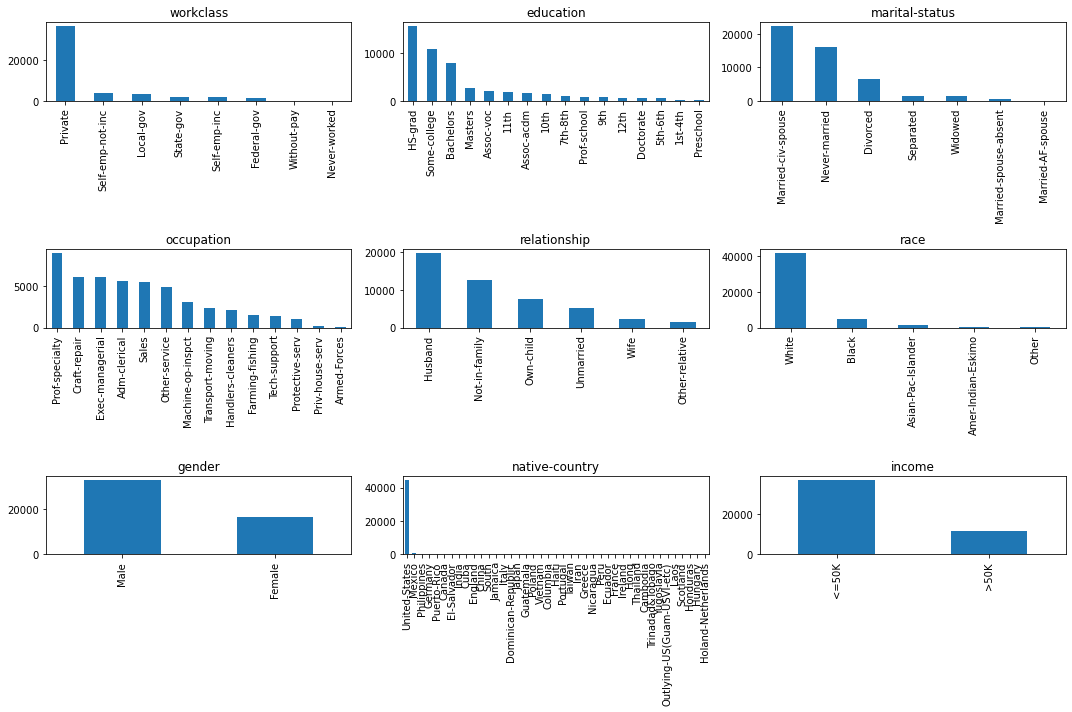

In [24]:
# Visualisation of the distribution of categorical variables
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

plt.figure(figsize=(15, 10))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
plt.tight_layout()
plt.show()

- Distribution of workclass: the most frequent category is "Private" with a huge difference comparing the others.
- Distribution of educacion: the main categories are HS-gradm Some-college and Bachelors.
- Distribution of marital-status: the main categoris are married and never married.
- Distribution of occupation: the most frequent categoris are adm-clerical, exec-amagerial, prof-speciality, craft-repair, sales and other-service.
- Distribution of relationship: Husband, Not in family and Own child
- Distribution of race: the most predominant is white
- ditribution of gender: male doubled to female
- Distribution of native country: the most relevant is united states
- distribution of income: the most predominat is below 50k

### b. Relationships with Target Variable

Explore how each categorical variable relates to the target variable (income).

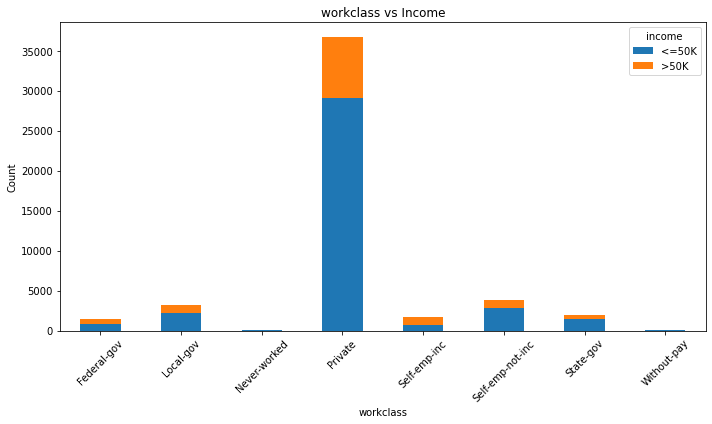

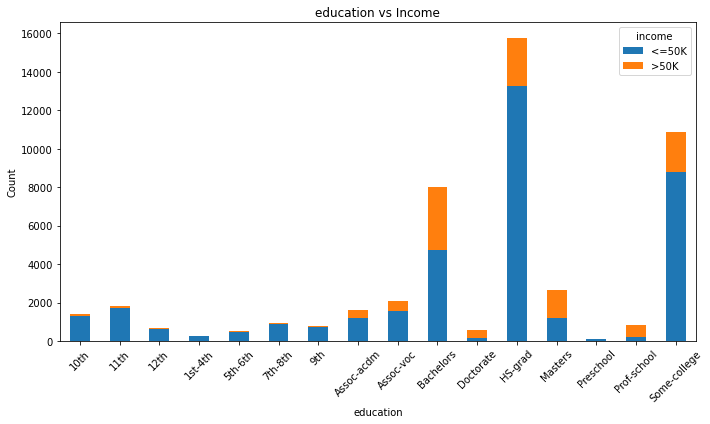

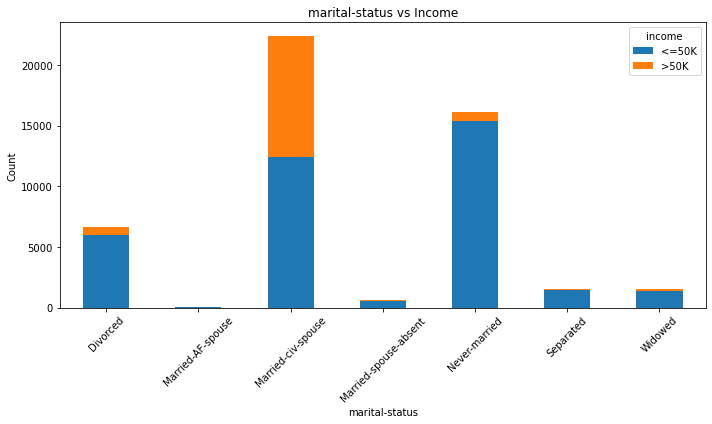

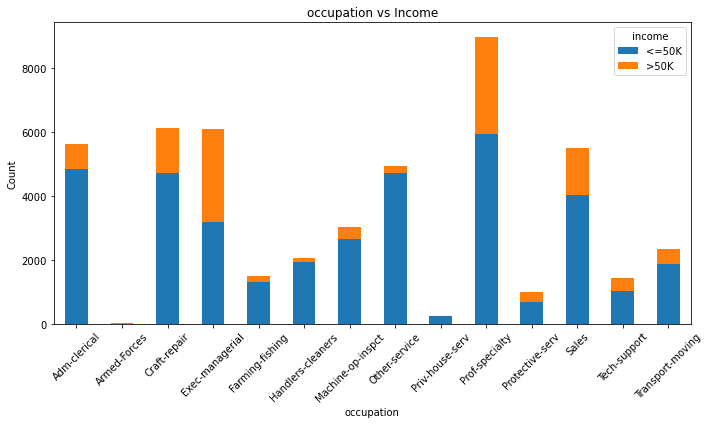

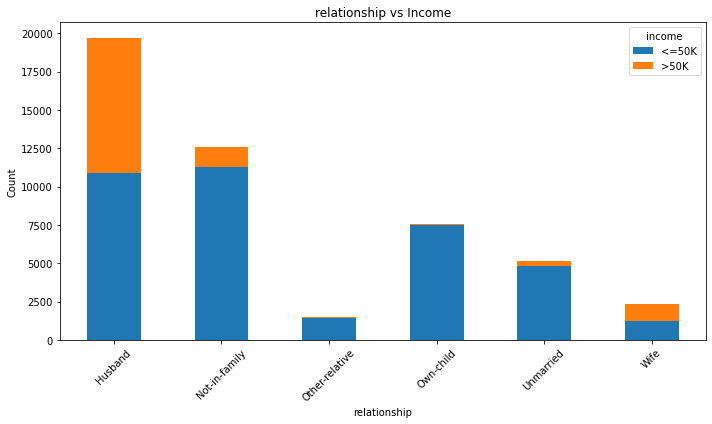

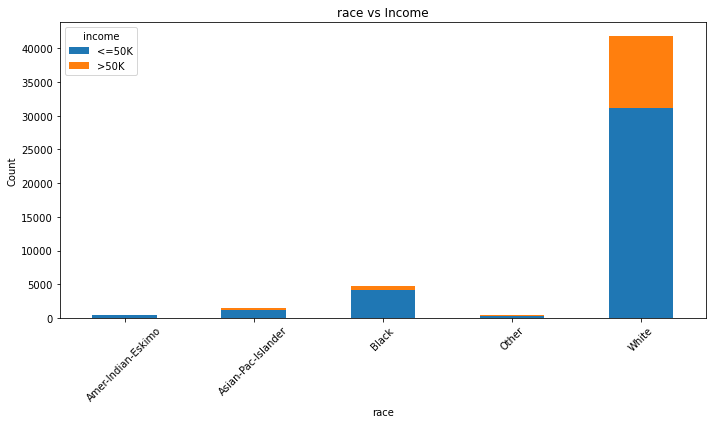

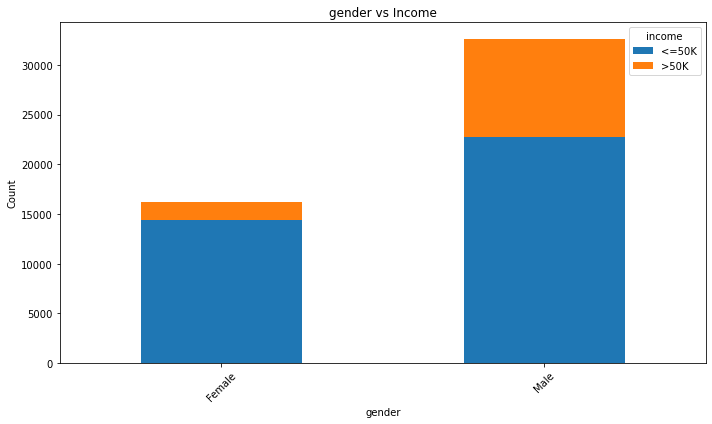

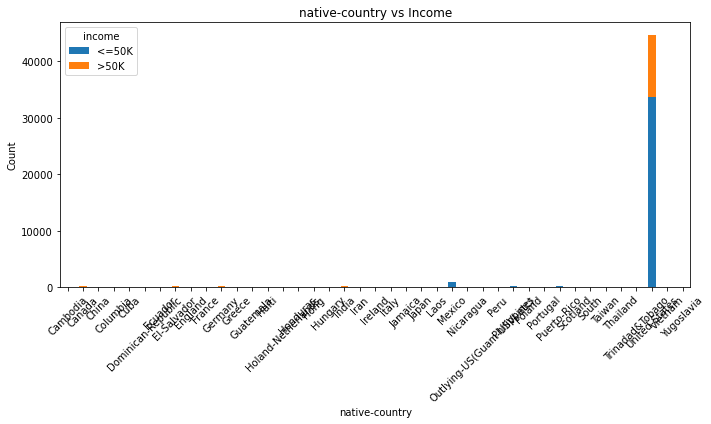

In [26]:
# Plotting settings
plt.rcParams.update({'figure.max_open_warning': 0})  # To avoid warnings when many figures are opened

# Loop through each categorical variable except 'income'
for category in df.select_dtypes(include=['object']).columns:
    if category != 'income':  # Avoid plotting income by income
        # Create a cross-tabulation
        crosstab = pd.crosstab(df[category], df['income'])

        # Plot the crosstab as a stacked bar chart
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'{category} vs Income')
        plt.xlabel(category)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate category labels for better visibility if necessary
        plt.tight_layout()
        plt.show()


## 3.2 - EDA - Numerical Variables

analyze the central tendency, dispersion, and the distribution shape, as well as relationships between numerical variables and the target.


### a. Descriptive Stastistic and Distribution

In [27]:
# Display descriptive statistics
print(df[numerical_vars].describe())


                age        fnlwgt  capital-gain  capital-loss  hours-per-week
count  48842.000000  4.884200e+04  48842.000000  48842.000000    48842.000000
mean      38.643585  1.896641e+05   1079.067626     87.502314       40.422382
std       13.710510  1.056040e+05   7452.019058    403.004552       12.391444
min       17.000000  1.228500e+04      0.000000      0.000000        1.000000
25%       28.000000  1.175505e+05      0.000000      0.000000       40.000000
50%       37.000000  1.781445e+05      0.000000      0.000000       40.000000
75%       48.000000  2.376420e+05      0.000000      0.000000       45.000000
max       90.000000  1.490400e+06  99999.000000   4356.000000       99.000000


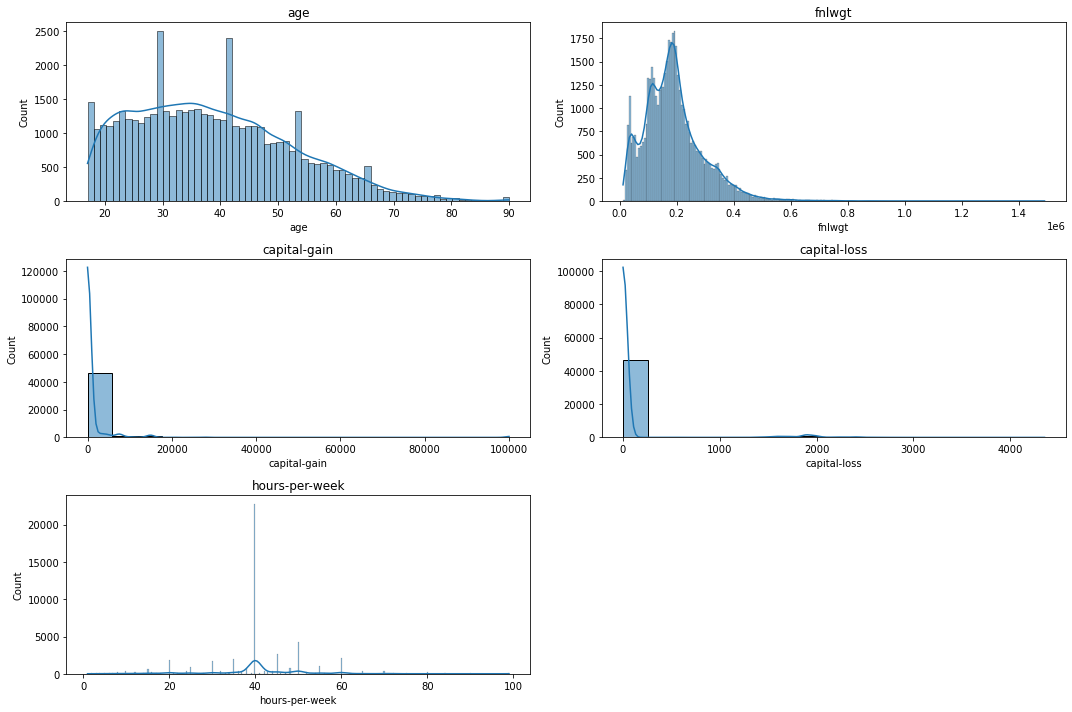

In [41]:
# Visualisation of the distribution of numerical variables
numerical_columns = ['age', 'fnlwgt',  'capital-gain', 'capital-loss', 'hours-per-week']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

### b. Boxplots to Indentify Outliers

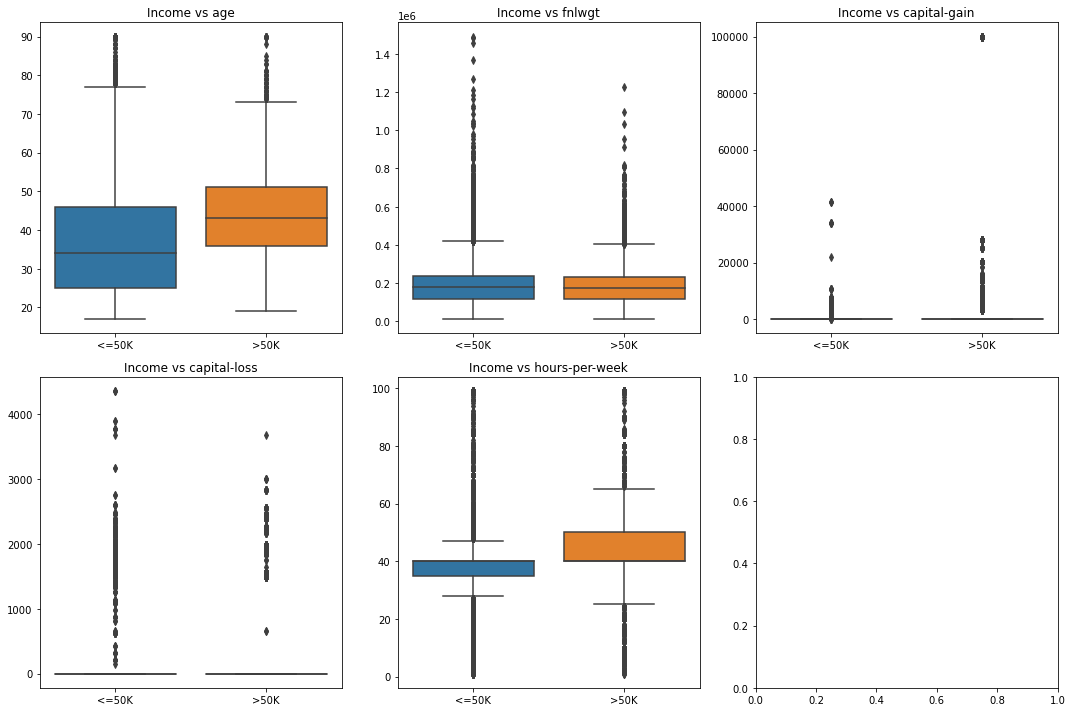

In [28]:
# Boxplots for each numerical variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_vars):
    sns.boxplot(x='income', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Income vs {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [29]:
def handle_outliers(data, action='detect'):
    outliers_dict = {}
    for feature in data.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if action == 'detect':
            outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
            outliers_dict[feature] = outliers
        elif action == 'remove':
            # Remove outliers
            data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
        elif action == 'cap':
            # Cap outliers
            data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)

    if action == 'detect':
        return outliers_dict
    return data

# To detect outliers
outliers_detected = handle_outliers(df, action='detect')
for key, value in outliers_detected.items():
    print(f"{key} has {len(value)} outliers")

# To remove or cap outliers
# df_no_outliers = handle_outliers(df_imputed, action='remove')
# df_capped = handle_outliers(df_imputed, action='cap')

age has 216 outliers
fnlwgt has 1453 outliers
capital-gain has 4035 outliers
capital-loss has 2282 outliers
hours-per-week has 13496 outliers


- Capital Gain and Loss: Outliers in capital-gain and capital-loss might actually represent meaningful variations in financial attributes of individuals. For example, a small number of individuals might have unusually high capital gains, which could be an important feature for predicting higher income.

- Hours per Week: Many people work typical hours (around 40 per week), but those working significantly less or more could be in specific types of jobs or industries that are relevant to your income prediction.

Due to the quantity of outliers, I am going to choose a classification that is not sensitive to outliers, like:

- Decicion Trees
- Random Forest

### c. Correlation Analysis

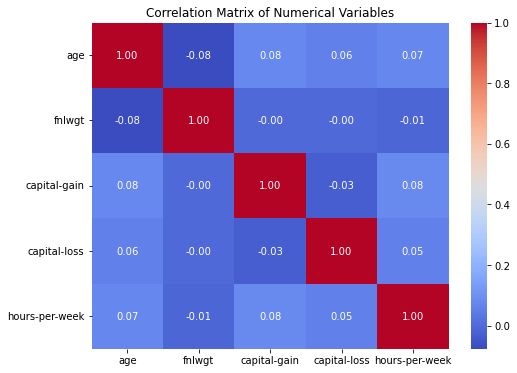

In [30]:
# Correlation matrix
corr_matrix = df[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


There are no particularly strong correlations between the variables, which is common in datasets with a large number of features and complex underlying relationships. The lack of strong correlation suggests that these variables can provide unique information to a model without much redundancy.

When building a classification model, features with low correlation to each other are generally good because they can add independent information to the model, improving its ability to learn from diverse aspects of the data.

# 4 Classification Model - Random Forest

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during the training phase and outputting the class that is the mode of the classes (classification) of the individual trees.

How Random Forest works:

- Bootstrap Aggregating (Bagging): Random Forest creates a lot of individual decision trees, each trained on a random subset of the data. This subset is drawn from the training set with replacement, known as bootstrapping.
- Feature Randomness: When splitting a node during the construction of a tree, the best split is chosen from a random subset of the features, rather than all features. This adds diversity to the model, making it robust.
- Decision Trees: Each tree in the forest is built to the largest extent possible (fully grown and unpruned). The randomness introduced during the construction of these trees ensures that they are not highly correlated.
- Voting: For classification tasks, each tree in the forest votes for a class, and the class with the most votes becomes the model's prediction.

Random Forest is good when dealing with outliers for several reasons:

- Robustness: Individual trees are relatively insensitive to outliers. Splits that define the decision trees are based on subsets of the overall dataset and are determined by the order of the values (e.g., median) rather than their magnitude. Thus, extreme outlier values do not heavily influence the split points. Random Forest inherits this robustness because it is an ensemble of decision trees.
- Averaging: Since Random Forest takes the mode of the predictions from all trees, even if some trees are influenced by outliers, the averaging effect will dilute the impact of these outliers. This is especially true when the number of trees is large.
- Feature Selection: At each split in a tree, a subset of features is randomly chosen. This further reduces the chance of outliers influencing the entire model, as only a subset of all decision trees will consider any single feature possibly containing outliers.

These characteristics make Random Forest a strong performer for datasets with outliers and non-normal distributions, as it does not make strong assumptions about the form of the input data compared to other algorithms like linear regression or logistic regression.

## 4.1 Encoding and prepairing data for model

In [31]:
# Define the target variable
y = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Remove the target variable from the feature set
df_features = df.drop(columns=['income'])

In [32]:
# Encoding categorical variables with OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(df_features.select_dtypes(include=['object']))

# Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

In [33]:
# Combine with numerical data
X = pd.concat([df_features.select_dtypes(include=['int64', 'float64']), encoded_df], axis=1)

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the resulting datasets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (39073, 96)
Shape of X_test: (9769, 96)
Shape of y_train: (39073,)
Shape of y_test: (9769,)


## 4.2 Training Random Forest

In [35]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [36]:
# Train the classifier
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

## 4.3 Evaluating the model

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.73      0.63      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.85      0.86      0.86      9769



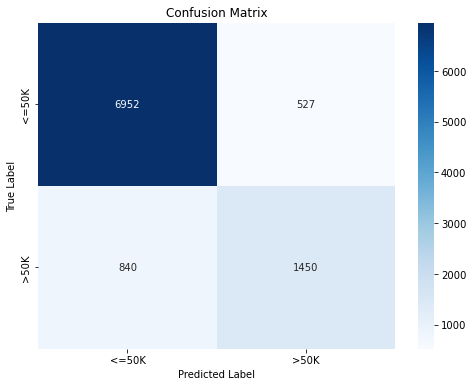

In [39]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [40]:
conf_matrix

array([[6952,  527],
       [ 840, 1450]], dtype=int64)

The result of the Random Forest model shows good accuracy and recall, especially for the majority class (0), but there is room for improvement for the minority class (1).

Imbalance Impact: The model performs well for the majority class (0) with a high precision and recall. However, it struggles with the minority class (1), showing lower precision and recall. This is a common issue in imbalanced datasets.

Overall Accuracy: The accuracy is 86%, which is good, but it masks the poor performance on the minority class.

Precision vs. Recall: Precision (0.73) and recall (0.63) for class 1 indicate the model is not very reliable in identifying the minority class correctly.

I am going to try the next technics:

- Resampling techniques, oversampling technique such as SMOTE or undersampling to balance the classes.

- Class Weights: Setting the parameter class_weight=‘balanced’ in RandomForest can help to deal with class imbalance.

- Hyperparameter tuning:Perform a hyperparameter search using Grid Search to find the best model parameters.

## 4.3 Resampling with SMOTE

In [59]:
conda install -c conda-forge imbalanced-learn

^C

Note: you may need to restart the kernel to use updated packages.


In [2]:
from imblearn.over_sampling import SMOTE

In [41]:
# Resampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

In [43]:
# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7434
           1       0.92      0.88      0.90      7428

    accuracy                           0.90     14862
   macro avg       0.90      0.90      0.90     14862
weighted avg       0.90      0.90      0.90     14862



In [45]:
print(confusion_matrix(y_test, y_pred))

[[6892  542]
 [ 891 6537]]


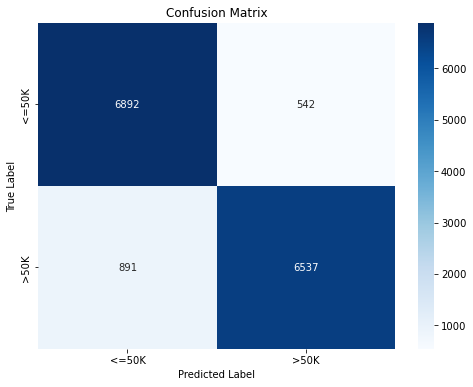

In [46]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Improved Balance: After applying SMOTE, the model performs significantly better on the minority class (1), with both precision and recall increasing to 0.92 and 0.88, respectively.

Overall Accuracy: The overall accuracy improved to 90%, indicating a better balance between the classes.

Class Distribution: The confusion matrix shows a more balanced distribution of true positives and true negatives, indicating that the model has learned to identify the minority class more effectively.

## 4.4 Use of Class_weight=balanced

In [47]:
# Train a Random Forest model with class_weight='balanced'
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [48]:
# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7434
           1       0.92      0.88      0.90      7428

    accuracy                           0.90     14862
   macro avg       0.90      0.90      0.90     14862
weighted avg       0.90      0.90      0.90     14862



In [49]:
print(confusion_matrix(y_test, y_pred))

[[6878  556]
 [ 883 6545]]


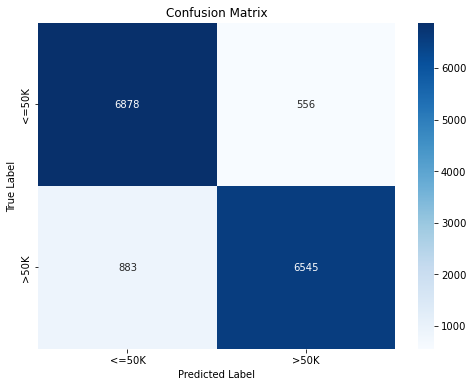

In [50]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Balanced Performance: Similar to the SMOTE approach, using class weights resulted in a significant improvement in the performance of the minority class (1). Precision and recall for class 1 are both around 0.92 and 0.88, respectively.

Overall Accuracy: The overall accuracy remains at 90%, consistent with the results from the SMOTE approach.

Class Weights Efficiency: Using class weights is a more straightforward approach compared to resampling and has produced comparable results, indicating that the model is now more balanced and effective at identifying both classes.

# 5 Summary of Models

Original Model: The original model had issues with class imbalance, showing good performance on the majority class but poor performance on the minority class.

SMOTE and Class Weighting: Both techniques (SMOTE and class_weight='balanced') effectively addressed the class imbalance issue, resulting in improved precision and recall for the minority class and overall better model performance.

Choice of Technique: While both methods improved the model, using class_weight='balanced' is simpler to implement and avoids potential pitfalls of overfitting that can come with oversampling techniques like SMOTE.

# 6 Workflow and Pipelines

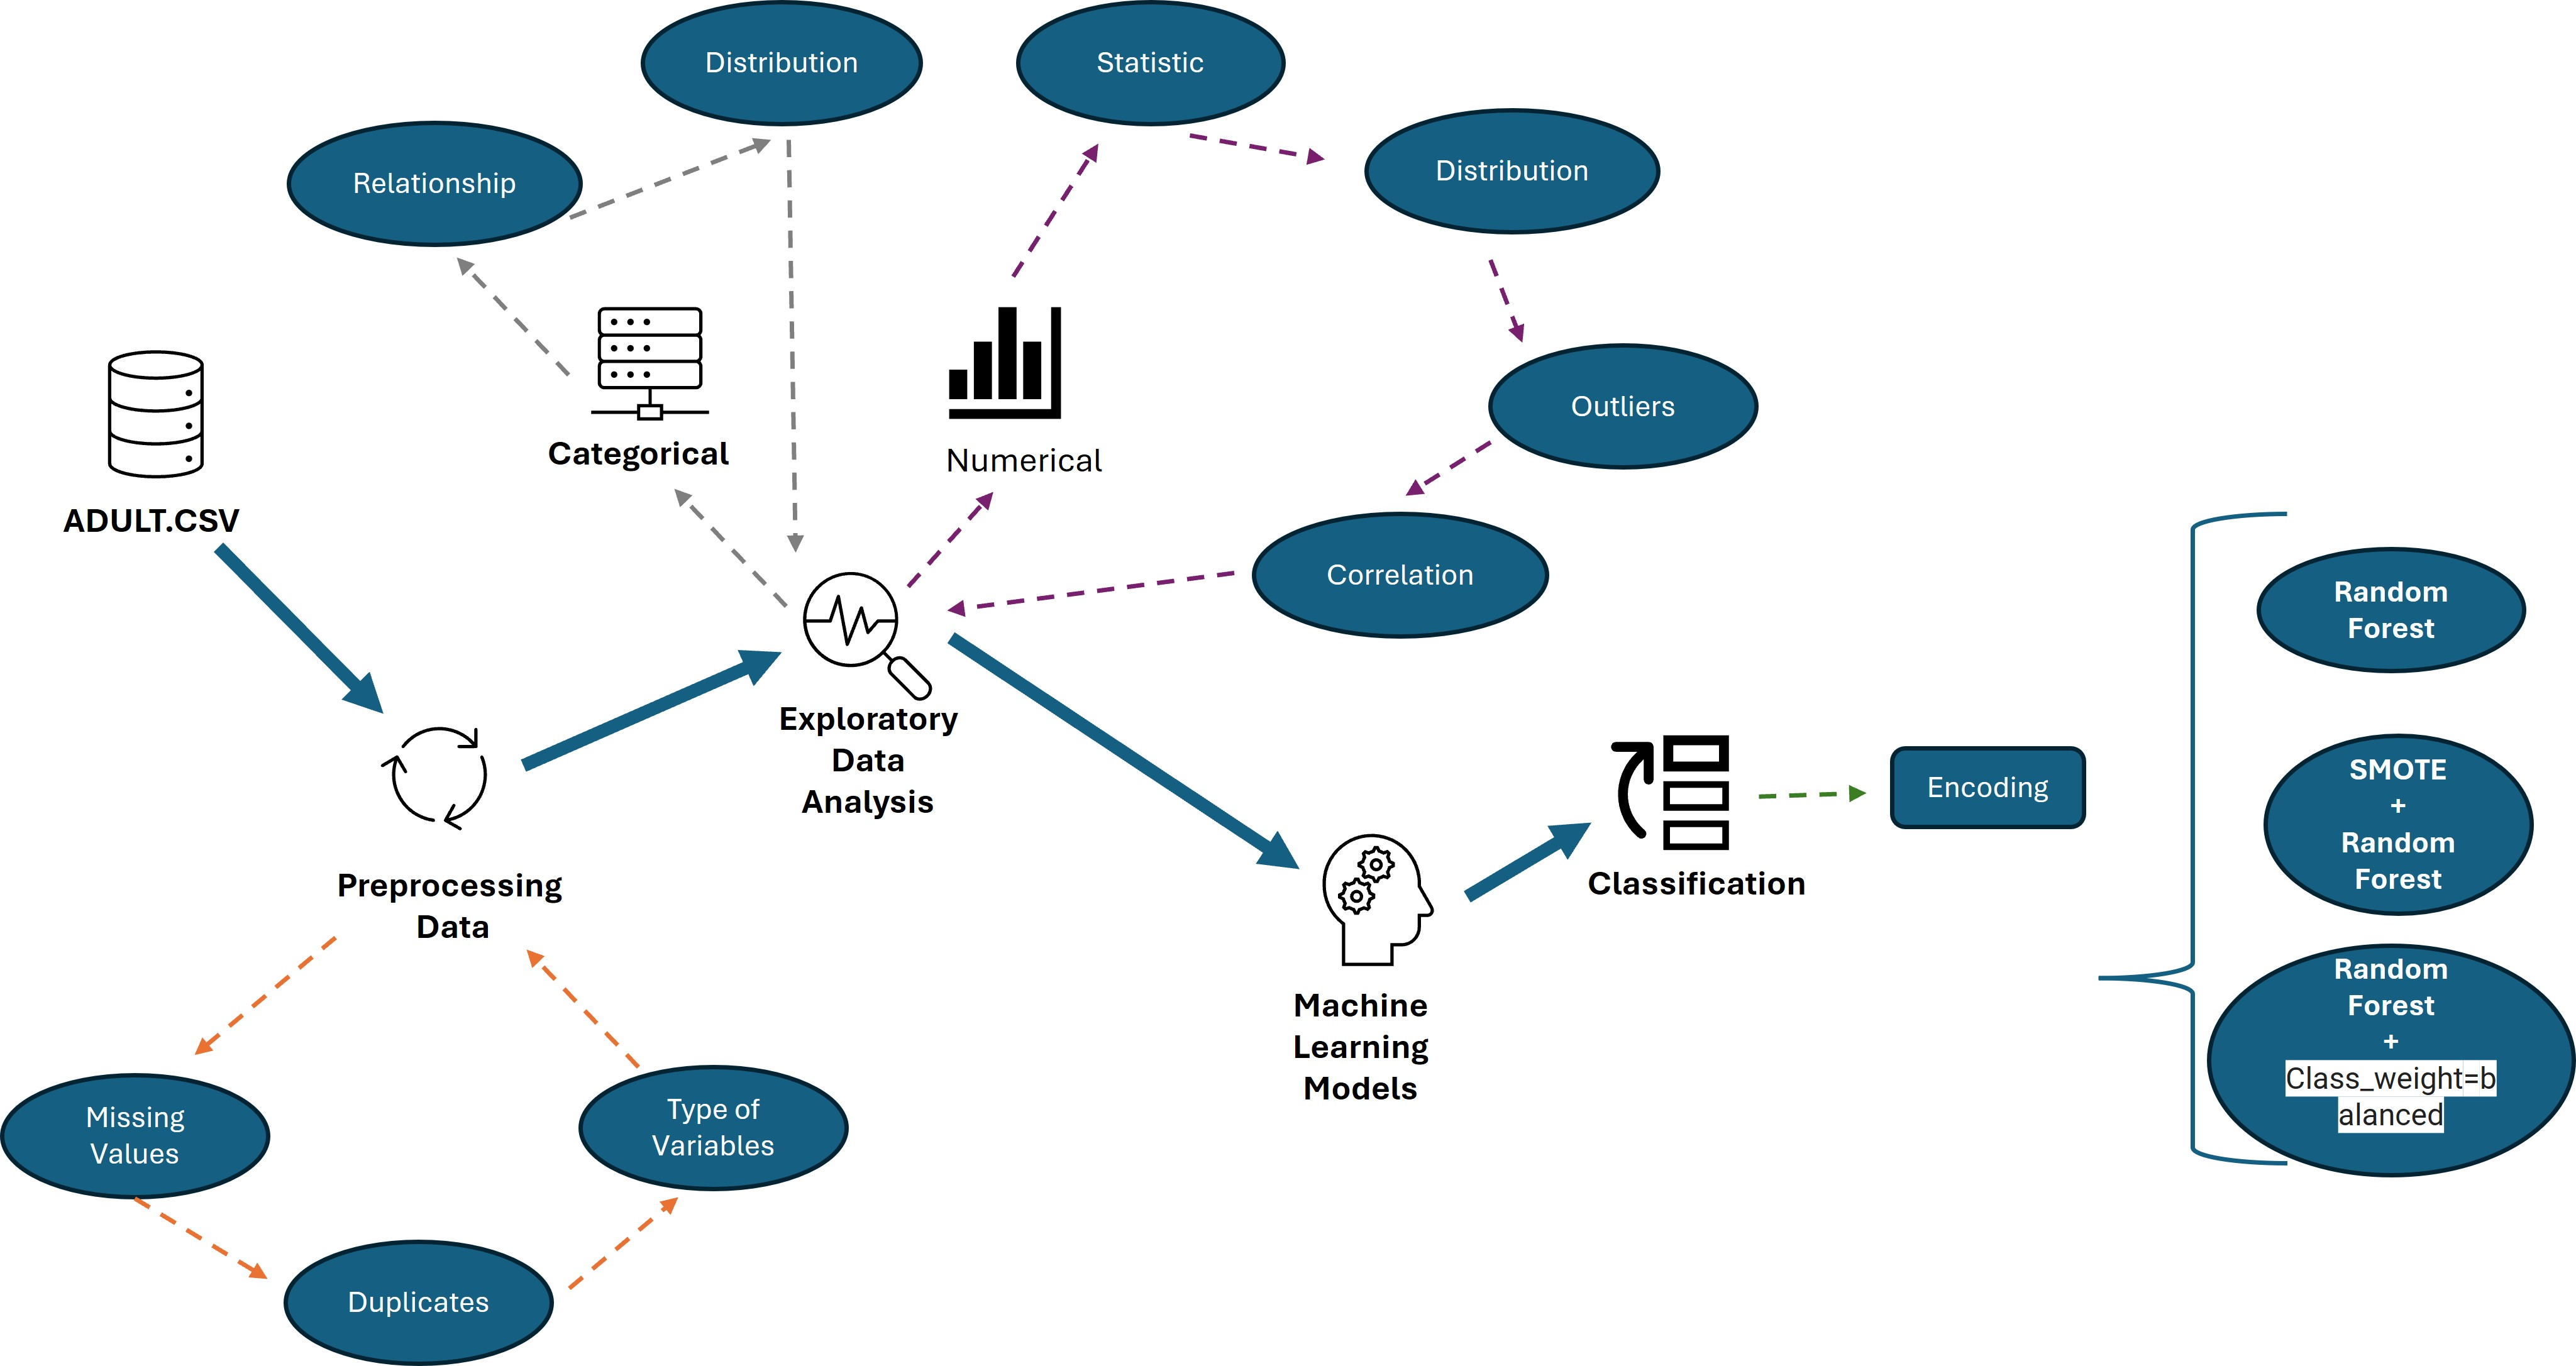